# Yankees - Event Propensity - Next Event Buyer Evaluation
* Ryan Kazmerik, Nakisa Rad, Joey Lai, Shawn Sutherland, Matt Bahler, Pat Faith
* Feb 22, 2022

In [21]:
import boto3
import json
import pandas as pd
import os

from pycaret.classification import *

boto3.setup_default_session(profile_name='Legacy-DataScienceAdmin')

%config InlineBackend.figure_format = 'retina'

### Let's load a previously played game as our test dataset:

In [9]:
df_testgame = pd.read_csv("./data/game2022-08-030000_part_00.csv")
df_testgame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573332 entries, 0 to 573331
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   daysOut              573332 non-null  object 
 1   eventDate            573332 non-null  object 
 2   tenure               573332 non-null  int64  
 3   dimCustomerMasterId  573332 non-null  int64  
 4   events_purchased     573332 non-null  int64  
 5   frequency_opponent   45620 non-null   float64
 6   frequency_eventDay   108136 non-null  float64
 7   frequency_eventTime  291792 non-null  float64
 8   inMarket             554600 non-null  object 
 9   distanceToVenue      490400 non-null  float64
 10  recent_openRate      0 non-null       float64
 11  recent_clickRate     0 non-null       float64
dtypes: float64(6), int64(3), object(3)
memory usage: 52.5+ MB


### We should fill in an NaN values with 0 with the exception of the distanceToVenue feature:

In [8]:
for col in df_test.columns:
    if col != 'distanceToVenue':
        df_testgame[col].fillna(0, inplace=True)
        
df_testgame.head()

,daysOut,eventDate,tenure,dimCustomerMasterId,events_purchased,frequency_opponent,frequency_eventDay,frequency_eventTime,inMarket,distanceToVenue,recent_openRate,recent_clickRate
0,Day Of,2022-08-03,1762,3283824,2,0.0,0.0,0.0,t,69.81,0.0,0.0
1,1 to 3 Days Out,2022-08-03,1762,3283824,2,0.0,0.0,0.0,t,69.81,0.0,0.0
2,4 to 7 Days Out,2022-08-03,1762,3283824,2,0.0,0.0,0.0,t,69.81,0.0,0.0
3,Over a Week,2022-08-03,1762,3283824,2,0.0,0.0,0.0,t,69.81,0.0,0.0
4,Day Of,2022-08-03,1803,2436396,44,1.0,1.0,1.0,f,337.85,0.0,0.0


### Now let's load the model and run the test game dataframe against it for predictions:

In [13]:
saved_model= load_model('./models/MLB Yankees - Event Propensity (22Feb2022)')

df_inference = predict_model(saved_model, data=df_testgame, raw_score=True)

print("Predictions ran successfully for df_testgame")

Transformation Pipeline and Model Successfully Loaded
Predictions ran successfully for df_testgame


### We can evaluate some metrics on who did and did_not purchase:

In [16]:
did_purchase = df_inference["Label"].value_counts()[1]
did_not_purchase = df_inference["Label"].value_counts()[0]
total_rows = df_inference["Label"].count()
purchase_percentage = round((did_purchase / total_rows)*100, 2)

print("Would purchase:", did_purchase)
print("Would not purchase:", did_not_purchase)
print("Purchase percentage:", purchase_percentage)

Would purchase: 165882
Would not purchase: 407450
Purchase percentage: 28.93


### Here we can see the distribution of fans who did and did not purchase : Score_0 = Did Not Purchase, Score_1 = Did Purchase:

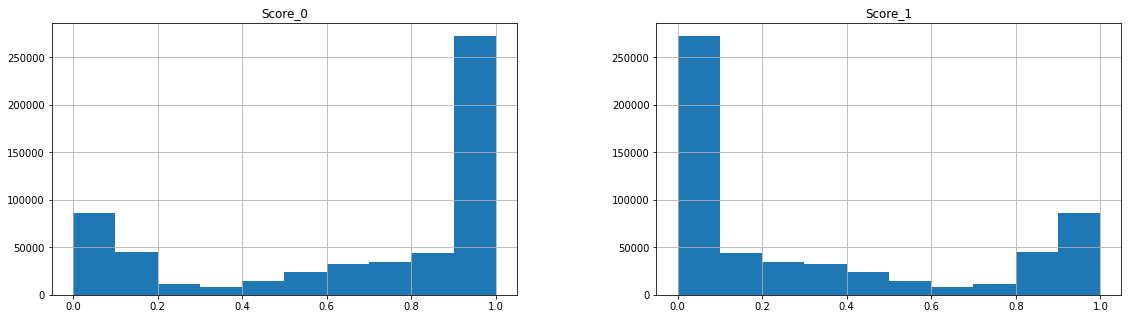

In [19]:
df_inference.hist(column=['Score_0', 'Score_1'], figsize=(30,5), layout=(1,3));